In [49]:
## Techniques for outlier detection and removal:Trimming,Capping,Z-score,IQR,Percentile
### This program deals with reading dataset,checking for heads,its shapes,NUll Value.
## Check for numeric and categorical  type of the column. 
##if null value in Numerice data replacing with mean
#for outlier detection and removal: Apply Trimming,Capping,Z-score,IQR,Percentile

In [50]:
#Step-1: Importing Necessary Dependencies

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [52]:
#Step-2: Read and Load the Dataset

In [53]:
df=pd.read_csv("D:\ineuron\EDA _Dataset\Dataset\data1\Travel.csv")

In [54]:
df1=df.copy()

In [55]:
df.shape

(4893, 20)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4893 entries, 0 to 4892
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4893 non-null   int64  
 1   ProdTaken                 4893 non-null   int64  
 2   Age                       4667 non-null   float64
 3   TypeofContact             4868 non-null   object 
 4   CityTier                  4893 non-null   int64  
 5   DurationOfPitch           4642 non-null   float64
 6   Occupation                4893 non-null   object 
 7   Gender                    4893 non-null   object 
 8   NumberOfPersonVisiting    4893 non-null   int64  
 9   NumberOfFollowups         4848 non-null   float64
 10  ProductPitched            4893 non-null   object 
 11  PreferredPropertyStar     4867 non-null   float64
 12  MaritalStatus             4893 non-null   object 
 13  NumberOfTrips             4753 non-null   float64
 14  Passport

In [57]:
##for keeping numerical data
num_col=[i for i in df.columns  if df[i].dtype!='O']  
num_col

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [58]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               235
dtype: int64

In [59]:
df_num=df[num_col]
df_num

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,204888,1,55.0,1,30.0,3,4.0,5.0,4.0,1,3,1,2.0,40321.0
4889,204889,1,56.0,2,34.0,4,5.0,5.0,4.0,1,3,0,2.0,37000.0
4890,204890,1,58.0,3,43.0,4,5.0,5.0,5.0,1,3,1,2.0,39812.0
4891,204891,1,59.0,1,32.0,3,4.0,5.0,6.0,1,1,0,2.0,52102.0


In [60]:
def replace_with_mean(data,num_col):   ## function for mean 
    for i in num_col:
        data[i].fillna(int(data[i].mean()),inplace=True)
    return 

In [61]:
df_mean_fill=df.copy()
replace_with_mean(df_mean_fill,df_num.columns)
df_mean_fill
df_mean_fill1=df_mean_fill.copy()

In [62]:
#Step-3: Plot the Distribution plots for the features

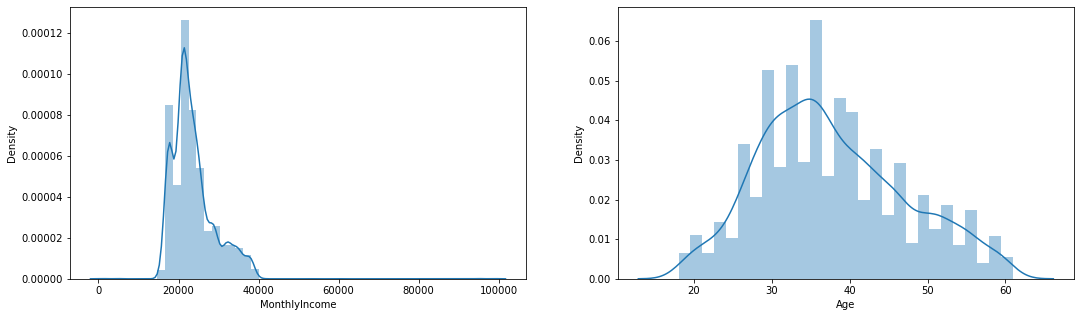

In [63]:

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.distplot(df['MonthlyIncome'])
plt.subplot(1,2,2)
sns.distplot(df['Age'])
plt.show()

In [64]:
##Step-6: Trimming of Outliers
def limit_threshold(df,variable):
    up_limit=df[variable].mean() +( 3*df[variable].std())
    low_limit=df[variable].mean()-(3*df[variable].std())
    print(df[variable],'upperlimit',up_limit,'lowerlimit',low_limit)
    return low_limit,up_limit

In [65]:

##Step-6: Trimming of Outliers
def replace_with_limit(df,num_col):
    df_new1=df.copy()
    for variable in num_col:
        a={'Age', 'MonthlyIncome'}.issubset(variable) 
        if a==True:
            #df.loc[df[variable ]<lower_limit1,variable ]=lower_limit1
            #df.loc[df[variable ]>upper_limit1,variable]=upper_limit1
            lower_limit,upper_limit=limit_threshold(df,variable ) 
            print(lower_limit,upper_limit)
            df_new1[variable] =df[(df[variable] < upper_limit) & (df[variable] > lower_limit)]
            # checking for how many ow many outliers are there in the dataset based on the upper and lower limit that we set up just
            new_df2=df[(df['variable'] >  upper_limit) | (df['variable'] <lower_limit)]
            print(new_df2)
           # df.drop(data_outlier.index)



In [66]:

#Step-6: Trimming of Outliers
##working on fill using mean so considering new df which has all  numerical values  in   df_new

num_col_mean=[i for i in df_mean_fill.columns  if df[i].dtype!='O']  
num_col_mean
df_new=df[num_col_mean]
df_new1=df_mean_fill
replace_with_mean(df_mean_fill,df_new.columns)

In [67]:
     df_new1

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,204888,1,55.0,Self Enquiry,1,30.0,Small Business,Female,3,4.0,Deluxe,5.0,Married,4.0,1,3,1,2.0,Executive,40321.0
4889,204889,1,56.0,Self Enquiry,2,34.0,Small Business,Male,4,5.0,Deluxe,5.0,Married,4.0,1,3,0,2.0,Executive,37000.0
4890,204890,1,58.0,Self Enquiry,3,43.0,Small Business,Female,4,5.0,Deluxe,5.0,Married,5.0,1,3,1,2.0,Executive,39812.0
4891,204891,1,59.0,Self Enquiry,1,32.0,Salaried,Male,3,4.0,Deluxe,5.0,Unmarried,6.0,1,1,0,2.0,Executive,52102.0


In [68]:
# checking for rows which are not fitting within the limit of upper and lower

In [69]:
###Zscore method
#Capping on Outliers: here we are cal.lower and upper limit using given below formula and if the values fails to fit 
#within it,we are #replacing with the lower and upper limit
def limit_threshold1(df,variable):
    up_limit=df[variable].mean() +( 3*df[variable].std())
    low_limit=df[variable].mean()-(3*df[variable].std())
    print(df[variable],'upperlimit',up_limit,'lowerlimit',low_limit)
    return low_limit,up_limit

##Step-6: Outliers 
def replace_with_limit(df,num_col):
    df_new1=df.copy()
    for variable in num_col: 
        a={'Age', 'MonthlyIncome'}.issubset(variable)
        if a==True:
            lower_limit,upper_limit=limit_threshold1(df,variable) 
            print(lower_limit,upper_limit)
        #Step-8: Now, apply the Capping check if >upper limit,replace by upperlimit,else <lower limit replace by lower limit,else return original
        #df[variable] = np.where(df[variable]>upper_limit,upper_limit,
         #                       np.where(df[variable]<lower_limit,lower_limit,df[variable])
          
            df.loc[df[variable]<lower_limit,variable]=lower_limit
            df.loc[df[variable]>upper_limit,variable]=upper_limit
      

In [70]:
df_mean_fill2=df_mean_fill
replace_with_limit(df_mean_fill2,df_new.columns)
df_mean_fill2


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,204888,1,55.0,Self Enquiry,1,30.0,Small Business,Female,3,4.0,Deluxe,5.0,Married,4.0,1,3,1,2.0,Executive,40321.0
4889,204889,1,56.0,Self Enquiry,2,34.0,Small Business,Male,4,5.0,Deluxe,5.0,Married,4.0,1,3,0,2.0,Executive,37000.0
4890,204890,1,58.0,Self Enquiry,3,43.0,Small Business,Female,4,5.0,Deluxe,5.0,Married,5.0,1,3,1,2.0,Executive,39812.0
4891,204891,1,59.0,Self Enquiry,1,32.0,Salaried,Male,3,4.0,Deluxe,5.0,Unmarried,6.0,1,1,0,2.0,Executive,52102.0


In [71]:
df_mean_fill2.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4893.0,202446.000000,1412.631764,200000.0,201223.0,202446.0,203669.0,204892.0
ProdTaken,4893.0,0.189046,0.391585,0.0,0.0,0.0,0.0,1.0
Age,4893.0,37.613938,9.117339,18.0,31.0,37.0,43.0,61.0
CityTier,4893.0,1.654404,0.916439,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4893.0,15.487431,8.324648,5.0,9.0,14.0,19.0,127.0
NumberOfPersonVisiting,4893.0,2.905579,0.724862,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4893.0,3.702636,1.000034,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4893.0,3.579195,0.797656,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4893.0,3.230533,1.821891,1.0,2.0,3.0,4.0,22.0
Passport,4893.0,0.291641,0.454564,0.0,0.0,0.0,1.0,1.0


In [72]:
# IQR based filtering

In [73]:
def outlier_threshold1(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    up1_limit=q2 +(1.5*iqr)
    low1_limit=q1-(1.5*iqr)
    return low1_limit,up1_limit

In [74]:
def replace_with_thershold1(df,num_col):
    for variable in num_col:
        a={'Age', 'MonthlyIncome'}.issubset(variable) 
        if a==True:
            lower_limit1,upper_limit1=outlier_threshold1(df_num,variable )
            print(lower_limit1,upper_limit1)
            df.loc[df[variable ]<lower_limit1,variable ]=lower_limit1
            df.loc[df[variable ]>upper_limit1,variable]=upper_limit1
        
         

In [75]:
df_mean_fill2=df_mean_fill1.copy()
df_mean_fill3=df_mean_fill1.copy()
replace_with_thershold1(df_mean_fill2,df_num.columns)

In [76]:

df_mean_fill2

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,204888,1,55.0,Self Enquiry,1,30.0,Small Business,Female,3,4.0,Deluxe,5.0,Married,4.0,1,3,1,2.0,Executive,40321.0
4889,204889,1,56.0,Self Enquiry,2,34.0,Small Business,Male,4,5.0,Deluxe,5.0,Married,4.0,1,3,0,2.0,Executive,37000.0
4890,204890,1,58.0,Self Enquiry,3,43.0,Small Business,Female,4,5.0,Deluxe,5.0,Married,5.0,1,3,1,2.0,Executive,39812.0
4891,204891,1,59.0,Self Enquiry,1,32.0,Salaried,Male,3,4.0,Deluxe,5.0,Unmarried,6.0,1,1,0,2.0,Executive,52102.0


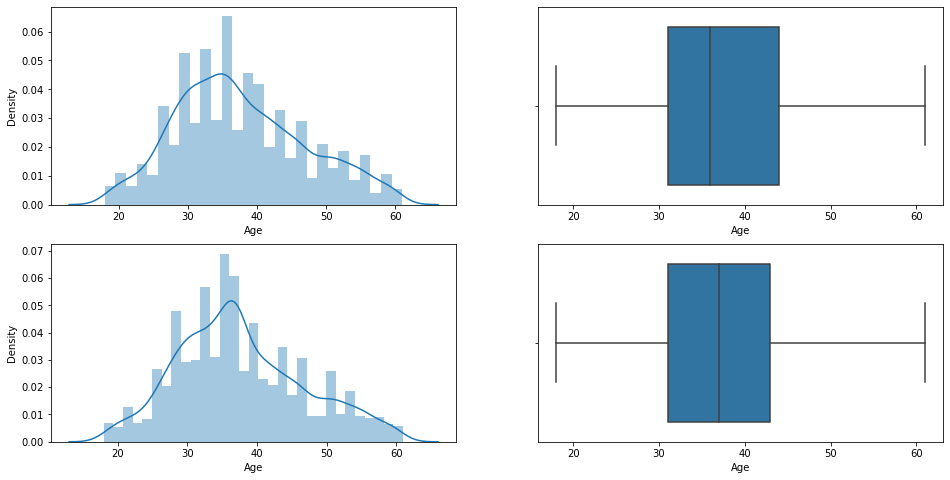

In [77]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['Age'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df1['Age'])
plt.subplot(2,2,3)
sns.distplot(df_mean_fill2['Age'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df_mean_fill2['Age'])
plt.show()

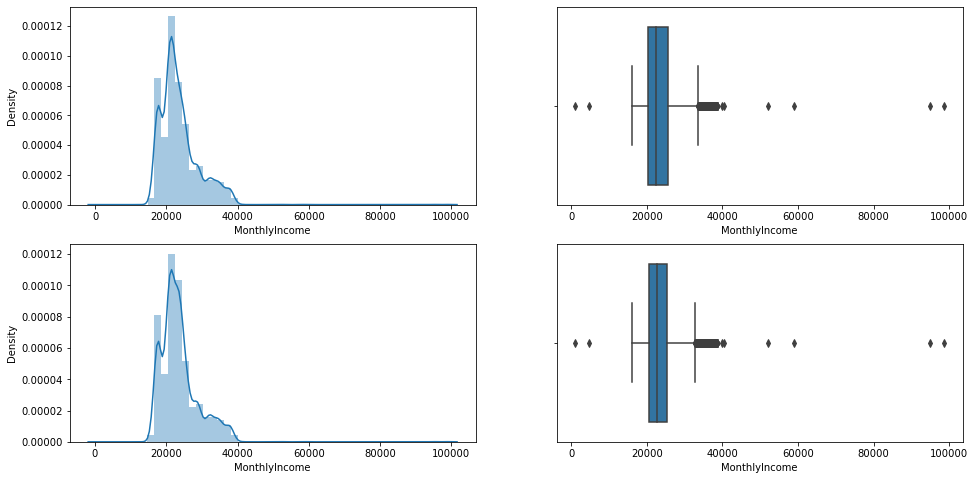

In [78]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['MonthlyIncome'],kde=True)
plt.subplot(2,2,2)
sns.boxplot(df1['MonthlyIncome'])
plt.subplot(2,2,3)
sns.distplot(df_mean_fill2['MonthlyIncome'],kde=True)
plt.subplot(2,2,4)
sns.boxplot(df_mean_fill2['MonthlyIncome'])
plt.show()

In [79]:
#Percentile :–# This technique works by setting a particular threshold value, which decides based on our problem statement.

#While we remove the outliers using capping, then that particular method is known as Winsorization.

#Here we always maintain symmetry on both sides means if remove 1% from the right then in the left we also drop by 1%.

In [80]:

def outlier_threshold1(df,variable):
    uplimit=df[variable].quantile(0.99)
    lowlimit=df[variable].quantile(0.01)
    return uplimit,lowlimit

def replace_with_thershold2(df,num_col):
    df_new4=df.copy()
    for variable in num_col:
        a={'Age', 'MonthlyIncome'}.issubset(variable) 
        if a==True:
            lower_limit1,upper_limit1=outlier_threshold1(df,variable ) 
            print(lower_limit1,upper_limit1)
            df_new4[variable] = df[(df[variable] >= upper_limit1) | (df[variable] <=lower_limit1)]
        print(df_new4)
    return df_new4

In [81]:
df_mean_fill3=df_mean_fill1.copy()           
df_new4=replace_with_thershold2(df_mean_fill3,df_num.columns)

      CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0  37.0     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4888      204888          1  55.0     Self Enquiry         1             30.0   
4889      204889          1  56.0     Self Enquiry         2             34.0   
4890      204890          1  58.0     Self Enquiry         3             43.0   
4891      204891          1  59.0     Self Enquiry         1             32.0   
4892      204892          1  60.0     Self Enquiry         2             45.0   

          Occupation  Gende

In [82]:
df_new4

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,204888,1,55.0,Self Enquiry,1,30.0,Small Business,Female,3,4.0,Deluxe,5.0,Married,4.0,1,3,1,2.0,Executive,40321.0
4889,204889,1,56.0,Self Enquiry,2,34.0,Small Business,Male,4,5.0,Deluxe,5.0,Married,4.0,1,3,0,2.0,Executive,37000.0
4890,204890,1,58.0,Self Enquiry,3,43.0,Small Business,Female,4,5.0,Deluxe,5.0,Married,5.0,1,3,1,2.0,Executive,39812.0
4891,204891,1,59.0,Self Enquiry,1,32.0,Salaried,Male,3,4.0,Deluxe,5.0,Unmarried,6.0,1,1,0,2.0,Executive,52102.0
